In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from functions import *

In [33]:
from scipy.stats import gaussian_kde
def scatter_with_gaussian_kde(ax, x, y, size):
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    ax.scatter(x, y, c=z, s=size)

# Best Topt performance

In [9]:
result = pd.read_csv('../data/performances/topt_best_topt_param_lr=0.0005.csv')

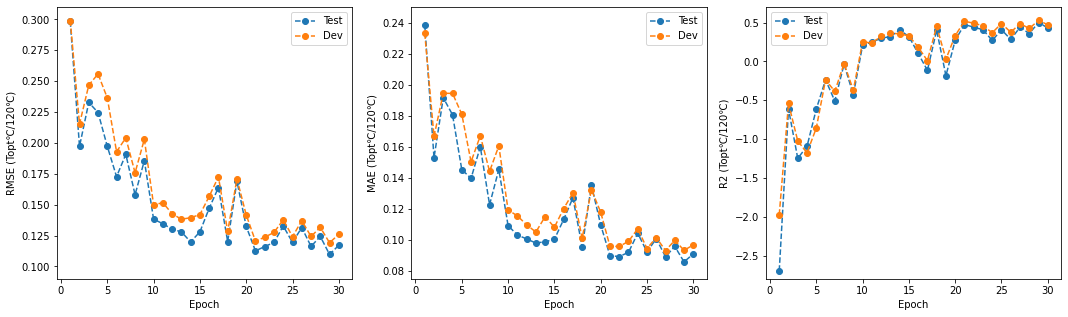

In [73]:
fig, axs = plt.subplots(1,3,figsize=(18,5))
axs[0].plot(result['Epoch'], result['rmse_test'], marker='o',ls='--',label='Test')
axs[0].plot(result['Epoch'], result['rmse_dev'],marker='o', ls='--',label='Dev')
axs[0].set_ylabel('RMSE (Topt\u2103/120\u2103)')
axs[1].plot(result['Epoch'], result['mae_test'], marker='o',ls='--', label='Test')
axs[1].plot(result['Epoch'], result['mae_dev'], marker='o',ls='--', label='Dev')
axs[1].set_ylabel('MAE (Topt\u2103/120\u2103)')
axs[2].plot(result['Epoch'], result['r2_test'], marker='o',ls='--',label='Test')
axs[2].plot(result['Epoch'], result['r2_dev'], marker='o', ls='--', label='Dev')
axs[2].set_ylabel('R2 (Topt\u2103/120\u2103)')
for ax in axs:
    ax.set_xlabel('Epoch')
    ax.legend()
axs[0].set_ylim([0.09,0.31])
axs[1].set_ylim([0.075,0.25])
axs[2].set_ylim([-2.8,0.7])
# plt.savefig('../../../Topt_paper/Figures/train_curve.svg',format='svg',dpi=150)

# Hyperparam Opt Topt

In [2]:
param_dict = {}
for i in range(1,10):
    param_dict[i] = load_pickle('../data/hyparams/params_'+str(i)+'.pkl')
perform_dict = {} 
for i in range(1,10):
    filename = '../data/performances/topt_params_'+str(i)+'_lr=0.0005.csv'
    perform_dict[i] = pd.read_csv(filename)

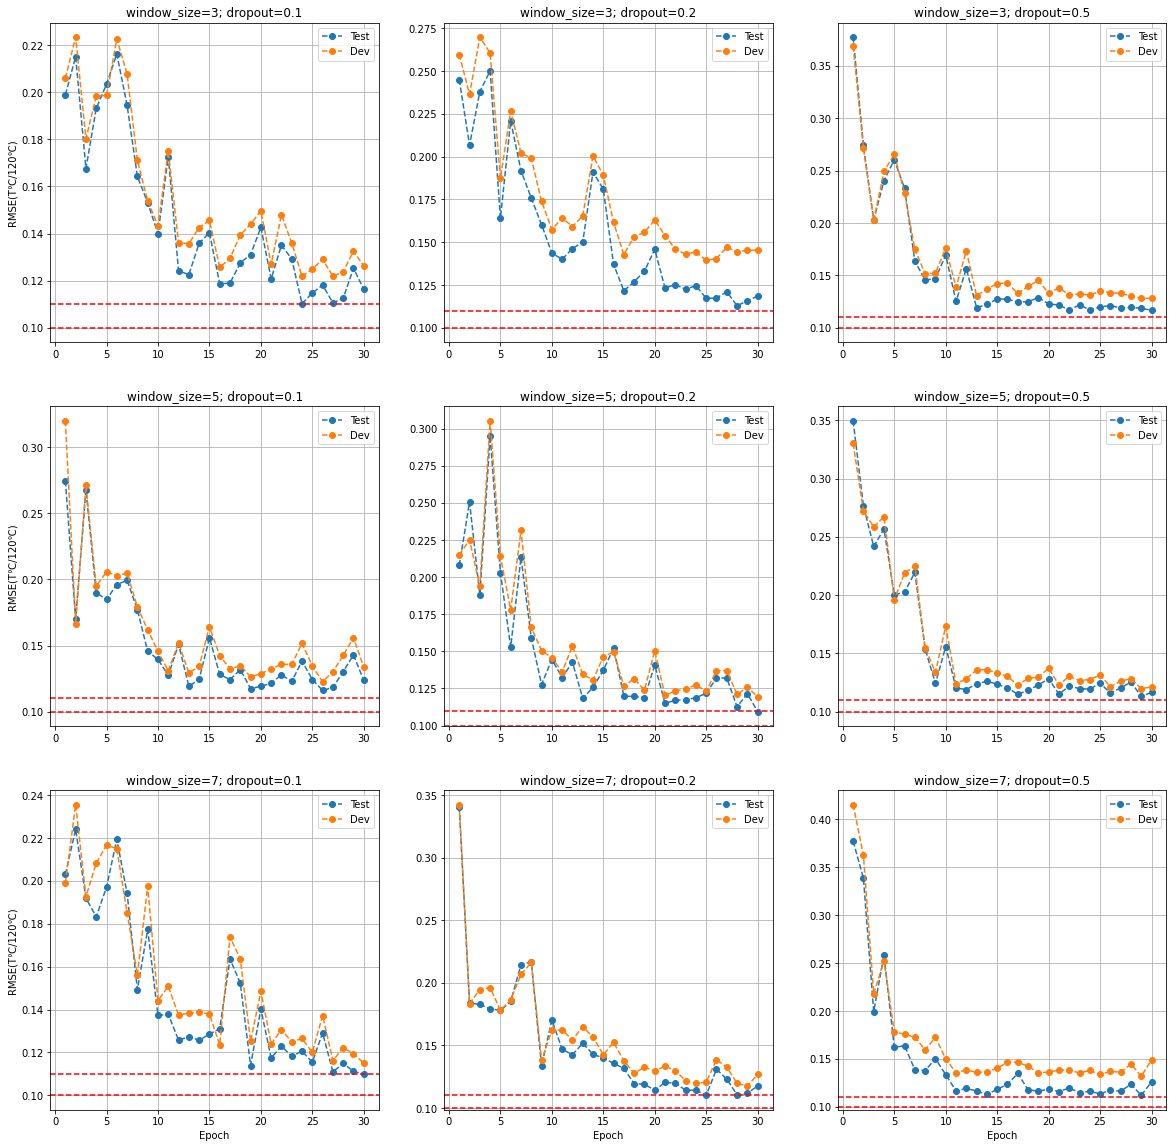

In [3]:
fig, axs = plt.subplots(3,3,figsize=(20,20))
for i in range(len(perform_dict.keys())):
    x,y = int(i/3), int(i%3)
    axs[x][y].plot( perform_dict[i+1]['Epoch'], perform_dict[i+1]['rmse_test'],'o--',label='Test' )
    axs[x][y].plot( perform_dict[i+1]['Epoch'], perform_dict[i+1]['rmse_dev'],'o--',label='Dev' )
    axs[x][y].legend()
    axs[x][y].grid()
    if y == 0:
        axs[x][y].set_ylabel('RMSE(T\u2103/120\u2103)')
    if x==2:
        axs[x][y].set_xlabel('Epoch')
    axs[x][y].set_title('window_size='+str(param_dict[i+1]['window'])+'; dropout='+str(param_dict[i+1]['dropout']))
    axs[x][y].axhline(y=0.1,color='r',ls='--')
    axs[x][y].axhline(y=0.11,color='r',ls='--')

In [15]:
# best_topt_param = { 'window':5,'dropout':0.2,'n_head':4,'n_RD':3 }
# dump_pickle( best_topt_param, '../data/hyparams/best_topt_param.pkl')

# Compare with Preoptem

In [7]:
ptem_out = pd.read_csv('../data/Comp_preoptem/test_preoptem.fasta.pred',sep='\t')
seq2topt_out = pd.read_csv('../data/Topt/test_preds.csv')
topt_test = pd.read_csv('../data/Topt/test.csv')
seq2topt_out['Exp'] = list(topt_test.topt)
ptem_pred = pd.DataFrame(zip(topt_test.uniprot_id, topt_test.topt,ptem_out.Predicted_optimal_temperature ),
                        columns=['ID','Exp','Pred'])

In [26]:
print( get_rmse( seq2topt_out['Exp'], seq2topt_out['pred_topt']) )
print( get_mae( seq2topt_out['Exp'], seq2topt_out['pred_topt']) )
print( get_r2( seq2topt_out['Exp'], seq2topt_out['pred_topt']) )

13.370774
10.552217
0.484638


In [17]:
print( get_rmse( ptem_pred['Exp'], ptem_pred['Pred']) )
print( get_mae( ptem_pred['Exp'], ptem_pred['Pred']) )
print( get_r2( ptem_pred['Exp'], ptem_pred['Pred']) )

15.042145
11.232552
0.347743


In [58]:
seq2topt_out_60 = seq2topt_out[seq2topt_out['Exp']>60].reset_index()
ptem_pred_60 = ptem_pred[ptem_pred['Exp']>60].reset_index()

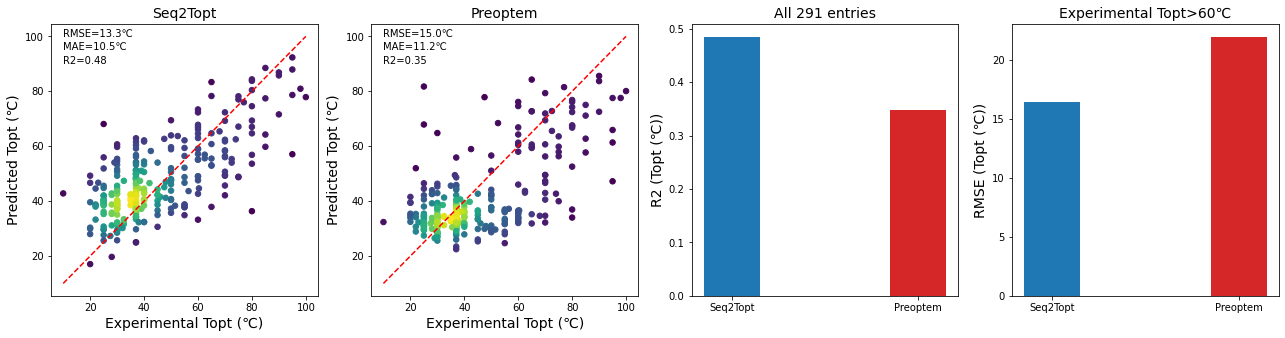

In [72]:
fig, axs = plt.subplots(1,4,figsize=(22,5))
scatter_with_gaussian_kde(axs[0], seq2topt_out['Exp'], seq2topt_out['pred_topt'], size = 30)
axs[0].plot([10,100],[10,100],'r--')
scatter_with_gaussian_kde(axs[1], ptem_pred['Exp'], ptem_pred['Pred'], size = 30)
axs[1].plot([10,100],[10,100],'r--')
axs[2].bar(['Seq2Topt','Preoptem'],
           [get_r2( seq2topt_out['Exp'], seq2topt_out['pred_topt']),get_r2( ptem_pred['Exp'], ptem_pred['Pred'])],
          color=['tab:blue', 'tab:red'], width=0.3)
axs[3].bar(['Seq2Topt','Preoptem'],
           [get_rmse( seq2topt_out_60['Exp'], seq2topt_out_60['pred_topt']),
            get_rmse( ptem_pred_60['Exp'], ptem_pred_60['Pred'])],
          color=['tab:blue', 'tab:red'], width=0.3)
for i in range(2):
    axs[i].set_xlabel('Experimental Topt (\u2103)',fontsize=14)
    axs[i].set_ylabel('Predicted Topt (\u2103)',fontsize=14)
axs[2].set_ylabel('R2 (Topt (\u2103))',fontsize=14)
axs[3].set_ylabel('RMSE (Topt (\u2103))',fontsize=14)
axs[2].set_title('All 291 entries',fontsize=14)
axs[3].set_title('Experimental Topt>60\u2103',fontsize=14)
axs[0].set_title('Seq2Topt',fontsize=14)
axs[1].set_title('Preoptem',fontsize=14)

axs[0].text(x=10,y=100,s='RMSE=13.3\u2103')
axs[0].text(x=10,y=95,s='MAE=10.5\u2103')
axs[0].text(x=10,y=90,s='R2=0.48')

axs[1].text(x=10,y=100,s='RMSE=15.0\u2103')
axs[1].text(x=10,y=95,s='MAE=11.2\u2103')
axs[1].text(x=10,y=90,s='R2=0.35')
# plt.savefig('../../../Topt_paper/Figures/model_comparison.svg',format='svg',dpi=150)